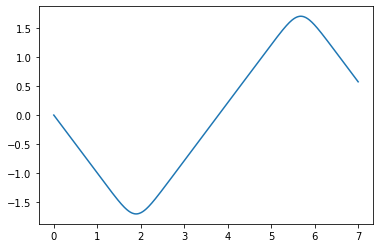

Contributes more than 10%:  0
Contributes more than 10%:  1
Contributes more than 10%:  2
Contributes more than 10%:  3
Contributes more than 10%:  4
Contributes more than 10%:  5
Contributes more than 10%:  6
Contributes more than 10%:  7
Contributes more than 10%:  8
Contributes more than 10%:  9
Contributes more than 10%:  10
Contributes more than 10%:  11
Contributes more than 10%:  12
Contributes more than 10%:  13
Contributes more than 10%:  14
Contributes more than 10%:  15
Contributes more than 10%:  16
Contributes more than 10%:  17
Contributes more than 10%:  18
Contributes more than 10%:  19
Contributes more than 10%:  20
Contributes more than 10%:  21
Contributes more than 10%:  22
Contributes more than 10%:  23
Contributes more than 10%:  24
Contributes more than 10%:  25
Contributes more than 10%:  26
Contributes more than 10%:  27
Contributes more than 10%:  28
Contributes more than 10%:  29
Contributes more than 10%:  30
Contributes more than 10%:  31
Contributes more t

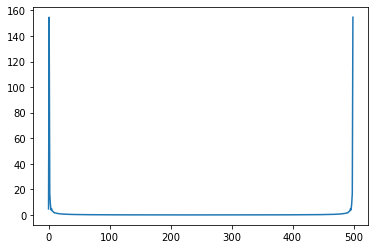

In [1]:
import matplotlib.pylab as plt
import numpy as np
import cmath                                  
a=0
b=7
n=500                                         
ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 0.;  y[1] = -1.
t = a;  h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])
def f( t, y):                                           
    fReturn[0] = y[1]                                             
    fReturn[1] = -0.01*y[0]**11
    return fReturn
def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                         
    for i in range(0, n):
        k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                          
    if ((t + h) > b):
        h = b - t                                        
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])
    
plt.plot(xp,yp)
plt.show()
#Decomposing into a Fourier series
N=500;  Np=N         
twopi=2.*np.pi; sq2pi = 1./np.sqrt(twopi); h = twopi/N
dftz=np.zeros( (Np), complex )              
nplot=np.zeros( N, float )   
fplot=np.zeros( N, float ) 
def fourier(dftz):                                              
    for n in range(0, Np):              
        zsum = complex(0.0, 0.0)                
        for  k in range(0, N):                              
            zexpo=complex(0, twopi*k*n/N)   
            zsum+=yp[k]*np.exp(-zexpo)
        dftz[n]=zsum * sq2pi      
        nplot[n]=n
        fplot[n]=np.sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)
        if abs(fplot[n]/fplot[0])>0.1: print("Contributes more than 10%: ", int(nplot[n]))
fourier(dftz)             
plt.plot(nplot,fplot)
plt.show()

<ipython-input-2-b110e64cff70>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  invsignal[n]=zsum/sq2pi/N


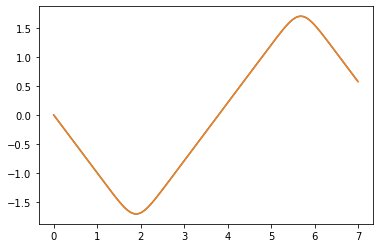

In [2]:
#Recompose original signal
invsignal=np.zeros( (N), float )
fplot2=np.zeros( N, float ) 
def invfourier(invsignal):                                            
    for n in range(0, Np):              
        zsum=complex(0.0, 0.0)                
        for  k in range(0, N):                              
            zexpo=complex(0, twopi*k*n/N)         
            zsum+=dftz[k]*np.exp(zexpo)           
        invsignal[n]=zsum/sq2pi/N     
        fplot2[n]=np.sqrt(invsignal[n].imag*invsignal[n].imag+invsignal[n].real*invsignal[n].real)

invfourier(invsignal)
xa=xp[0:500]
plt.plot(xa,invsignal.real)
plt.plot(xp,yp)
plt.show()

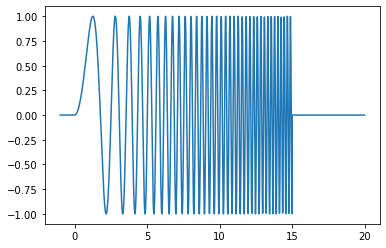

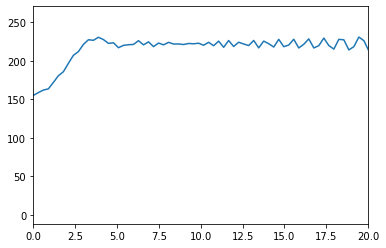

In [3]:
#chirp signal
def func(t):
    return func1(t)
def func1(t):
    if(0<t and t<15):
        return np.sin(t**2)
    else:
        return 0
h=0.01
t=np.arange(-1,20,h)
N=len(t)
y=np.zeros(N)
dftz=np.zeros(N,complex)
nplot=np.zeros(N)
fplot=np.zeros(N)
for idx in range(len(t)):
    y[idx]=func(t[idx])

fig=plt.figure()
plt.plot(t, y)
plt.show()  

def fourier(signal):    
    for n in range(0, N):              
        zsum = complex(0.0, 0.0)                
        for  k in range(0, N):                              
            zexpo=complex(0, 2*np.pi*k*n/N)
            zsum+=signal[k]*np.exp(-zexpo)           
        dftz[n]=zsum*np.sqrt(2*np.pi)      
        nplot[n]=n/N/h*2*np.pi
        fplot[n]=np.sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)
fourier(y)
fig=plt.figure() 
plt.plot(nplot,fplot)
plt.xlim([0,20])
plt.show()